# TCC WASM -  Análise Estatiscas

Análise dos dados de execução do processamento de detecção de faces compilados com WebAssembly versus compilação nativa com visual C++. O objetivo desta pesqusias em constatar a diferença de performance entre um código compilado p/ WebAssembly e outro com compilaçção nativa.

## Ferramentas para analise

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Dados de testes

O conjunto de dados de teste é formado por três vídeos selecionados a partir do *site* YouTube.
Os critérios de seleção foram: ser um video de acesso publico, ou seja, sem restrições para reprodução e estar 
disponível em formato MPEG-4 com resolução padrão de 1920px por 1080px.

In [17]:
df_dataset = pd.read_csv('./data/dataset.csv')
df_dataset

,id,extension,resolution,frames,fps,youtube_link
0,DATASET_1,mp4,1920x1080,3915,24,https://www.youtube.com/watch?v=EWUdGRAwUpY
1,DATASET_2,mp4,1920x1080,3020,30,https://www.youtube.com/watch?v=vQtLX6pW5eA
2,DATASET_3,mp4,1920x1080,12296,50,https://www.youtube.com/watch?v=RuL5jVqc4Tg


## Resultados

Foram feitos testes com uma aplicação nativa usado o Windows10 e com WebAssembly usando Chrome 75 e Firefox 67 executando no mesmo sistema operacional e maquina fisica com as configuraçãoes padrão de instalação. 

In [18]:
df_meta_fd = pd.read_csv('./data/META_LOG_FACE_DETECT.csv')
df_meta_fd

,workload,dataset,resolution,system,total_frames,total_frames_processeds,test_total_time_ms,log_file


## Carregar dados de teste




In [19]:
#dataset_1
df_d1sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_Chrome_75_Windows.csv')
df_d1mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_Chrome_75_Windows.csv')
df_d1lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_Chrome_75_Windows.csv')
df_d1sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_Firefox_68_Windows.csv')
df_d1mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_Firefox_68_Windows.csv')
df_d1lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_Firefox_68_Windows.csv')
df_d1swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_WINDOWS_10_WIN32.csv')
df_d1mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_WINDOWS_10_WIN32.csv')
df_d1lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_WINDOWS_10_WIN32.csv')

#dataset_2
df_d2sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_Chrome_75_Windows.csv')
df_d2mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_Chrome_75_Windows.csv')
df_d2lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_Chrome_75_Windows.csv')
df_d2sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_Firefox_68_Windows.csv')
df_d2mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_Firefox_68_Windows.csv')
df_d2lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_Firefox_68_Windows.csv')
df_d2swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_WINDOWS_10_WIN32.csv')
df_d2mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_WINDOWS_10_WIN32.csv')
df_d2lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_WINDOWS_10_WIN32.csv')

#dataset_3
df_d3sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_Chrome_75_Windows.csv')
df_d3mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_Chrome_75_Windows.csv')
df_d3lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_Chrome_75_Windows.csv')
df_d3sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_Firefox_68_Windows.csv')
df_d3mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_Firefox_68_Windows.csv')
df_d3lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_Firefox_68_Windows.csv')
df_d3swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_WINDOWS_10_WIN32.csv')
df_d3mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_WINDOWS_10_WIN32.csv')
df_d3lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_WINDOWS_10_WIN32.csv')

frames_ds1 =[df_d1sc, df_d1mc, df_d1lc, df_d1sf, df_d1mf, df_d1lf, df_d1swin, df_d1mwin, df_d1lwin]
df_ds1 = pd.concat(frames_ds1, sort=False)
frames_ds2 =[df_d2sc, df_d2mc, df_d2lc, df_d2sf, df_d2mf, df_d2lf, df_d2swin, df_d2mwin, df_d2lwin]
df_ds2 = pd.concat(frames_ds2, sort=False)
frames_ds3 =[df_d3sc, df_d3mc, df_d3lc, df_d3sf, df_d3mf, df_d3lf, df_d3swin, df_d3mwin, df_d3lwin]
df_ds3 = pd.concat(frames_ds3, sort=False)

In [20]:
print('DATASET_1', df_ds1['id'].count(), 'DATASET_2', df_ds2['id'].count(), 'DATASET_3', df_ds3['id'].count())
print('TOTAL', df_ds1['id'].count() + df_ds2['id'].count() + df_ds3['id'].count())

DATASET_1 9191 DATASET_2 7057 DATASET_3 22523
TOTAL 38771


## Selecionar dados de teste

O criterio de uniformização dos dados é considerar apenas as medições que tiveram o mesmo numero de rostos detectados,
para fazer isso é necessario identificar qual a quantidade de rostos detectados mais comuns que seja diferente de zero.

In [21]:
ds1_faces_detected_rank = df_ds1[df_ds1["faces_detected"] > 0]['faces_detected'].value_counts()
ds2_faces_detected_rank = df_ds2[df_ds2["faces_detected"] > 0]['faces_detected'].value_counts()
ds3_faces_detected_rank = df_ds3[df_ds3["faces_detected"] > 0]['faces_detected'].value_counts()
print("DATASET_1 - Rank com a quantidade mais comum de rostos detectados:")
print(ds1_faces_detected_rank)
print("DATASET_2 - Rank com a quantidade mais comum de rostos detectados:")
print(ds2_faces_detected_rank)
print("DATASET_3 - Rank com a quantidade mais comum de rostos detectados:")
print(ds3_faces_detected_rank)

DATASET_1 - Rank com a quantidade mais comum de rostos detectados:
1    4258
2    1177
3      43
4       1
Name: faces_detected, dtype: int64
DATASET_2 - Rank com a quantidade mais comum de rostos detectados:
1    2381
2     939
3     216
4      42
5       4
Name: faces_detected, dtype: int64
DATASET_3 - Rank com a quantidade mais comum de rostos detectados:
1    9769
2    3354
3    1936
4     787
5     110
6      11
Name: faces_detected, dtype: int64


In [22]:
#dataset_1
df_ds1 = df_ds1[df_ds1["faces_detected"] == ds1_faces_detected_rank.head(1).index[0]]
df_ds1 = df_ds1.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_2
df_ds2 = df_ds2[df_ds2["faces_detected"] == ds2_faces_detected_rank.head(1).index[0]]
df_ds2 = df_ds2.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_3
df_ds3 = df_ds3[df_ds3["faces_detected"] == ds3_faces_detected_rank.head(1).index[0]]
df_ds3 = df_ds3.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

frames_ds123 =[df_ds1, df_ds2, df_ds3]
df_ds = pd.concat(frames_ds123, sort=False)

print('DATASET_1', df_ds1['dataset'].count(), 
      'DATASET_2', df_ds2['dataset'].count(), 
      'DATASET_3', df_ds3['dataset'].count())
print('TOTAL', df_ds1['dataset'].count() + df_ds2['dataset'].count() + df_ds3['dataset'].count())
print('TOTAL df_ds', df_ds['dataset'].count())

DATASET_1 4258 DATASET_2 2381 DATASET_3 9769
TOTAL 16408
TOTAL df_ds 16408


## Aalise Estatística

### Dados de teste - DATASET_1

In [23]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds1_group = df_ds1.groupby(['dataset','system', 'resolution_label'])
df_ds1_group[['total_time_ms']].agg(['count'])

total_time_ms
                                                      count
dataset   system             resolution_label              
DATASET_1 Chrome_75_Windows  LARGE                      372
                             MEDIUM                     377
                             SMALL                      378
          Firefox_68_Windows LARGE                       88
                             MEDIUM                     175
                             SMALL                      378
          WINDOWS_10_WIN32   LARGE                      850
                             MEDIUM                     841
                             SMALL                      799

In [24]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds1_group = df_ds1.groupby(['dataset','system', 'resolution_label'])
df_ds1_st = df_ds1_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds1_st

process_time_ms          \
                                                         mean  median   
dataset   system             resolution_label                           
DATASET_1 Chrome_75_Windows  LARGE                1004.373656  1069.5   
                             MEDIUM                436.275862   428.0   
                             SMALL                 209.431217   196.0   
          Firefox_68_Windows LARGE                 877.011364   901.0   
                             MEDIUM                374.342857   371.0   
                             SMALL                 161.719577   161.0   
          WINDOWS_10_WIN32   LARGE                 237.211765   243.0   
                             MEDIUM                109.181926   107.0   
                             SMALL                  58.470588    53.0   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_1 Chrome_75_Windows  LARGE               3.295699      3    0.000000   
                             MEDIUM              1.143236      1    0.000000   
                             SMALL               0.121693      0    0.000000   
          Firefox_68_Windows LARGE               5.136364      5    0.090909   
                             MEDIUM              1.891429      2    0.085714   
                             SMALL               0.743386      1    0.066138   
          WINDOWS_10_WIN32   LARGE               8.104706      8    0.000000   
                             MEDIUM              4.033294      4    0.001189   
                             SMALL               1.410513      1    0.002503   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_1 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.005714      0   
                             SMALL                 0    0.002646      0   
          WINDOWS_10_WIN32   LARGE                 0    2.129412      2   
                             MEDIUM                0    0.653983      1   
                             SMALL                 0    0.020025      0   

                                              total_time_ms          
                                                       mean  median  
dataset   system             resolution_label                        
DATASET_1 Chrome_75_Windows  LARGE              1041.973118  1103.5  
                             MEDIUM              463.838196   454.0  
                             SMALL               233.465608   218.5  
          Firefox_68_Windows LARGE               920.465909   944.0  
                             MEDIUM              407.200000   402.0  
                             SMALL               190.359788   190.5  
          WINDOWS_10_WIN32   LARGE               252.448235   259.0  
                             MEDIUM              116.802616   114.0  
                             SMALL                61.245307    56.0

### Dados de teste - DATASET_2

In [25]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds2_group = df_ds2.groupby(['dataset','system', 'resolution_label'])
df_ds2_group[['total_time_ms']].agg(['count'])

total_time_ms
                                                      count
dataset   system             resolution_label              
DATASET_2 Chrome_75_Windows  LARGE                      266
                             MEDIUM                     249
                             SMALL                      183
          Firefox_68_Windows LARGE                       31
                             MEDIUM                      71
                             SMALL                      117
          WINDOWS_10_WIN32   LARGE                      582
                             MEDIUM                     528
                             SMALL                      354

In [26]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds2_group = df_ds2.groupby(['dataset','system', 'resolution_label'])
df_ds2_st=df_ds2_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds2_st

process_time_ms         \
                                                         mean median   
dataset   system             resolution_label                          
DATASET_2 Chrome_75_Windows  LARGE                1466.236842   1428   
                             MEDIUM                603.477912    595   
                             SMALL                 240.628415    240   
          Firefox_68_Windows LARGE                1221.322581   1158   
                             MEDIUM                445.507042    440   
                             SMALL                 177.854701    179   
          WINDOWS_10_WIN32   LARGE                 315.472509    317   
                             MEDIUM                127.859848    127   
                             SMALL                  71.474576     62   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_2 Chrome_75_Windows  LARGE               3.357143      3    0.000000   
                             MEDIUM              1.096386      1    0.000000   
                             SMALL               0.049180      0    0.000000   
          Firefox_68_Windows LARGE               5.903226      5    0.096774   
                             MEDIUM              1.577465      2    0.070423   
                             SMALL               0.641026      1    0.051282   
          WINDOWS_10_WIN32   LARGE               7.501718      7    0.000000   
                             MEDIUM              3.723485      3    0.003788   
                             SMALL               1.355932      1    0.000000   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_2 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.004016      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.008547      0   
          WINDOWS_10_WIN32   LARGE                 0    2.201031      2   
                             MEDIUM                0    0.662879      1   
                             SMALL                 0    0.025424      0   

                                              total_time_ms          
                                                       mean  median  
dataset   system             resolution_label                        
DATASET_2 Chrome_75_Windows  LARGE              1504.657895  1465.5  
                             MEDIUM              630.911647   623.0  
                             SMALL               263.934426   264.0  
          Firefox_68_Windows LARGE              1267.645161  1210.0  
                             MEDIUM              477.028169   473.0  
                             SMALL               204.923077   206.0  
          WINDOWS_10_WIN32   LARGE               330.067010   332.0  
                             MEDIUM              134.962121   134.0  
                             SMALL                74.418079    65.0

### Dados de teste - DATASET_3

In [27]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds3_group = df_ds3.groupby(['dataset','system', 'resolution_label'])
df_ds3_group[['total_time_ms']].agg(['count'])

total_time_ms
                                                      count
dataset   system             resolution_label              
DATASET_3 Chrome_75_Windows  LARGE                      371
                             MEDIUM                     391
                             SMALL                      448
          Firefox_68_Windows LARGE                      132
                             MEDIUM                     247
                             SMALL                      499
          WINDOWS_10_WIN32   LARGE                     2557
                             MEDIUM                    2674
                             SMALL                     2450

In [28]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds3_group = df_ds3.groupby(['dataset','system', 'resolution_label'])
df_ds3_st = df_ds3_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds3_st

process_time_ms         \
                                                         mean median   
dataset   system             resolution_label                          
DATASET_3 Chrome_75_Windows  LARGE                 780.048518  748.0   
                             MEDIUM                424.700767  403.0   
                             SMALL                 212.462054  199.0   
          Firefox_68_Windows LARGE                 713.181818  667.5   
                             MEDIUM                385.408907  370.0   
                             SMALL                 172.647295  167.0   
          WINDOWS_10_WIN32   LARGE                 225.871334  214.0   
                             MEDIUM                101.048990   99.0   
                             SMALL                  56.804082   54.0   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_3 Chrome_75_Windows  LARGE               3.336927      3    0.000000   
                             MEDIUM              1.171355      1    0.000000   
                             SMALL               0.109375      0    0.000000   
          Firefox_68_Windows LARGE               5.045455      5    0.045455   
                             MEDIUM              2.174089      2    0.117409   
                             SMALL               0.863727      1    0.076152   
          WINDOWS_10_WIN32   LARGE               8.415722      8    0.001173   
                             MEDIUM              3.967464      3    0.000000   
                             SMALL               1.542041      1    0.000000   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_3 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.012146      0   
                             SMALL                 0    0.000000      0   
          WINDOWS_10_WIN32   LARGE                 0    2.601877      2   
                             MEDIUM                0    0.925206      1   
                             SMALL                 0    0.000000      0   

                                              total_time_ms         
                                                       mean median  
dataset   system             resolution_label                       
DATASET_3 Chrome_75_Windows  LARGE               820.768194  791.0  
                             MEDIUM              456.268542  433.0  
                             SMALL               239.321429  225.0  
          Firefox_68_Windows LARGE               753.810606  706.5  
                             MEDIUM              420.655870  403.0  
                             SMALL               202.468938  197.0  
          WINDOWS_10_WIN32   LARGE               242.164646  231.0  
                             MEDIUM              108.477562  106.0  
                             SMALL                59.782857   57.0

### Dados de teste - Geral (DATASET_1, DATASET_2, DATASET_3)

In [29]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds_group = df_ds.groupby(['dataset','system', 'resolution_label'])
df_ds_group[['total_time_ms']].agg(['count'])

total_time_ms
                                                      count
dataset   system             resolution_label              
DATASET_1 Chrome_75_Windows  LARGE                      372
                             MEDIUM                     377
                             SMALL                      378
          Firefox_68_Windows LARGE                       88
                             MEDIUM                     175
                             SMALL                      378
          WINDOWS_10_WIN32   LARGE                      850
                             MEDIUM                     841
                             SMALL                      799
DATASET_2 Chrome_75_Windows  LARGE                      266
                             MEDIUM                     249
                             SMALL                      183
          Firefox_68_Windows LARGE                       31
                             MEDIUM                      71
                             SMALL                      117
          WINDOWS_10_WIN32   LARGE                      582
                             MEDIUM                     528
                             SMALL                      354
DATASET_3 Chrome_75_Windows  LARGE                      371
                             MEDIUM                     391
                             SMALL                      448
          Firefox_68_Windows LARGE                      132
                             MEDIUM                     247
                             SMALL                      499
          WINDOWS_10_WIN32   LARGE                     2557
                             MEDIUM                    2674
                             SMALL                     2450

In [32]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds_group = df_ds.groupby(['system', 'resolution_label'])
df_ds_st = df_ds_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds_st

process_time_ms        pre_time_ms         \
                                               mean median        mean median   
system             resolution_label                                             
Chrome_75_Windows  LARGE                1043.651140    996    3.327056      3   
                   MEDIUM                472.763029    467    1.142576      1   
                   SMALL                 216.435084    207    0.103072      0   
Firefox_68_Windows LARGE                 833.378486    768    5.183267      5   
                   MEDIUM                390.135903    380    1.987830      2   
                   SMALL                 169.104628    166    0.791751      1   
WINDOWS_10_WIN32   LARGE                 241.360742    231    8.216094      8   
                   MEDIUM                106.242147    103    3.949295      3   
                   SMALL                  58.615043     54    1.494588      1   

                                    tag_time_ms        pos_time_ms         \
                                           mean median        mean median   
system             resolution_label                                         
Chrome_75_Windows  LARGE               0.000000      0    0.000000      0   
                   MEDIUM              0.000000      0    0.000983      0   
                   SMALL               0.000000      0    0.000000      0   
Firefox_68_Windows LARGE               0.067729      0    0.000000      0   
                   MEDIUM              0.099391      0    0.008114      0   
                   SMALL               0.069416      0    0.002012      0   
WINDOWS_10_WIN32   LARGE               0.000752      0    2.442717      2   
                   MEDIUM              0.000742      0    0.834529      1   
                   SMALL               0.000555      0    0.006939      0   

                                    total_time_ms         
                                             mean median  
system             resolution_label                       
Chrome_75_Windows  LARGE              1082.614470   1034  
                   MEDIUM              501.833825    497  
                   SMALL               241.591675    233  
Firefox_68_Windows LARGE               875.701195    808  
                   MEDIUM              423.997972    414  
                   SMALL               198.152918    195  
WINDOWS_10_WIN32   LARGE               257.180998    247  
                   MEDIUM              113.668068    110  
                   SMALL                61.545101     57

### Performance do Prgrama Conceito - DATASET_01

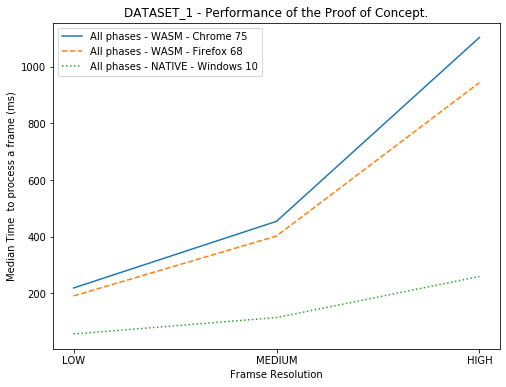

Nativo resolution_label
SMALL      56.0
MEDIUM    114.0
LARGE     259.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     190.5
MEDIUM    402.0
LARGE     944.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL      218.5
MEDIUM     454.0
LARGE     1103.5
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.52
Comparação Chrome x Firefox: 0.13


In [93]:
total_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
total_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
total_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]

plt.rcParams["figure.figsize"] = (8,6)

linestyles = ['-', '--', '-.', ':']

fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="All phases - WASM - Chrome 75", linestyle=linestyles[0])
ax1.plot(activity, total_f, label="All phases - WASM - Firefox 68",linestyle=linestyles[1])
ax1.plot(activity, total_w, label="All phases - NATIVE - Windows 10",linestyle=linestyles[3])
ax1.legend()

plt.xlabel('Framse Resolution')
plt.ylabel('Median Time  to process a frame (ms)')
plt.title("DATASET_1 - Performance of the Proof of Concept.")
plt.legend()

plt.show()

print("Nativo", total_w)
print("Wams Firefox", total_f)
print("Wams Chrome", total_c)
print("Comparação Nativo x Firefox:", ((((total_w - total_f) * 100)/total_w)/100).mean().round(2))
print("Comparação Chrome x Firefox:", ((((total_c - total_f) * 100)/total_c)/100).mean().round(2))

### Performance do Prgrama Conceito - DATASET_02

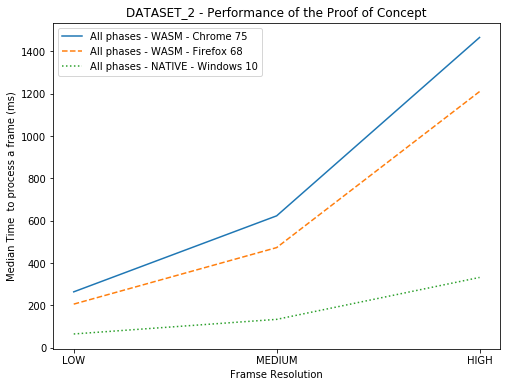

Nativo resolution_label
SMALL      65.0
MEDIUM    134.0
LARGE     332.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL      206.0
MEDIUM     473.0
LARGE     1210.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL      264.0
MEDIUM     623.0
LARGE     1465.5
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.53
Comparação Chrome x Firefox: -0.28


In [94]:
total_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
total_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
total_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]


fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="All phases - WASM - Chrome 75",linestyle=linestyles[0])
ax1.plot(activity, total_f, label="All phases - WASM - Firefox 68",linestyle=linestyles[1])
ax1.plot(activity, total_w, label="All phases - NATIVE - Windows 10",linestyle=linestyles[3])
ax1.legend()

plt.xlabel('Framse Resolution')
plt.ylabel('Median Time  to process a frame (ms)')
plt.title("DATASET_2 - Performance of the Proof of Concept")
plt.legend()

plt.show()

print("Nativo", total_w)
print("Wams Firefox", total_f)
print("Wams Chrome", total_c)
print("Comparação Nativo x Firefox:", ((((total_w - total_f) * 100)/total_w)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((total_f - total_c) * 100)/total_f)/100).median().round(2))

### Performance do Prgrama Conceito - DATASET_03

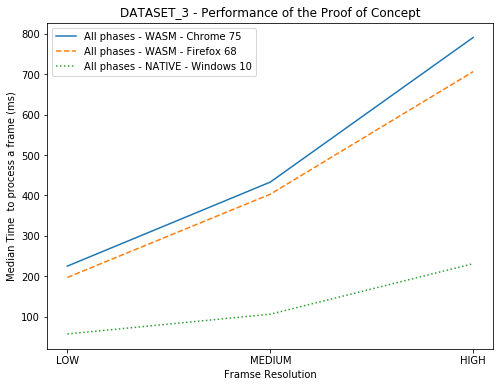

Nativo resolution_label
SMALL      57.0
MEDIUM    106.0
LARGE     231.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     197.0
MEDIUM    403.0
LARGE     706.5
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL     225.0
MEDIUM    433.0
LARGE     791.0
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.46
Comparação Chrome x Firefox: -0.12


In [95]:
total_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
total_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
total_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]

fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="All phases - WASM - Chrome 75",linestyle=linestyles[0])
ax1.plot(activity, total_f, label="All phases - WASM - Firefox 68",linestyle=linestyles[1])
ax1.plot(activity, total_w, label="All phases - NATIVE - Windows 10",linestyle=linestyles[3])
ax1.legend()

plt.xlabel('Framse Resolution')
plt.ylabel('Median Time  to process a frame (ms)')
plt.title("DATASET_3 - Performance of the Proof of Concept")
plt.legend()

plt.show()

print("Nativo", total_w)
print("Wams Firefox", total_f)
print("Wams Chrome", total_c)
print("Comparação Nativo x Firefox:", ((((total_w - total_f) * 100)/total_w)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((total_f - total_c) * 100)/total_f)/100).median().round(2))

In [57]:
ds1_total_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
ds1_total_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
ds1_total_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
ds2_total_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
ds2_total_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
ds2_total_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
ds3_total_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
ds3_total_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
ds3_total_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()

df_total_c = pd.concat([ds1_total_c, ds2_total_c, ds3_total_c], sort=False)
df_total_f = pd.concat([ds1_total_f, ds2_total_f, ds3_total_f], sort=False)
df_total_w = pd.concat([ds1_total_w, ds2_total_w, ds3_total_w], sort=False)

print("Nativo", df_total_w)
print("Wams Firefox", df_total_f)
print("Wams Chrome", df_total_c)
print("Comparação Nativo x Firefox:", ((((df_total_w - df_total_f) * 100)/df_total_w)/100).median().round(2))
print("Comparação Nativo x Chrome:", ((((df_total_w - df_total_c) * 100)/df_total_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((df_total_f - df_total_c) * 100)/df_total_f)/100).median().round(2))


Nativo resolution_label
SMALL      56.0
MEDIUM    114.0
LARGE     259.0
SMALL      65.0
MEDIUM    134.0
LARGE     332.0
SMALL      57.0
MEDIUM    106.0
LARGE     231.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL      190.5
MEDIUM     402.0
LARGE      944.0
SMALL      206.0
MEDIUM     473.0
LARGE     1210.0
SMALL      197.0
MEDIUM     403.0
LARGE      706.5
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL      218.5
MEDIUM     454.0
LARGE     1103.5
SMALL      264.0
MEDIUM     623.0
LARGE     1465.5
SMALL      225.0
MEDIUM     433.0
LARGE      791.0
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.53
Comparação Nativo x Chrome: -3.06
Comparação Firefox x Chrome: -0.15


### Performance da Detecção - DATASET_01

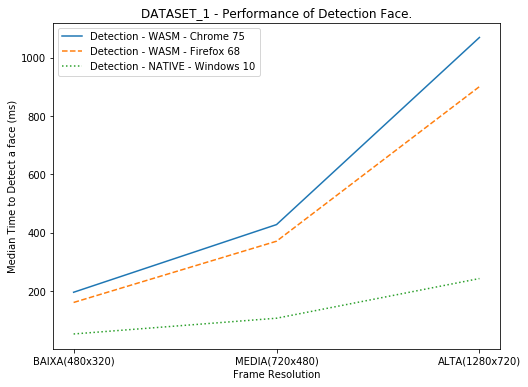

Nativo resolution_label
SMALL      196.0
MEDIUM     428.0
LARGE     1069.5
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     161.0
MEDIUM    371.0
LARGE     901.0
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL      196.0
MEDIUM     428.0
LARGE     1069.5
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.47
Comparação Firefox x Chrome: -0.19


In [69]:
pro_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
pro_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
pro_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
activity = ["BAIXA(480x320)", "MEDIA(720x480)", "ALTA(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="Detection - WASM - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pro_f, label="Detection - WASM - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pro_w, label="Detection - NATIVE - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Frame Resolution')
plt.ylabel('Median Time to Detect a face (ms)')
plt.title("DATASET_1 - Performance of Detection Face.")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median().round(2))

### Performance da Detecção - DATASET_02

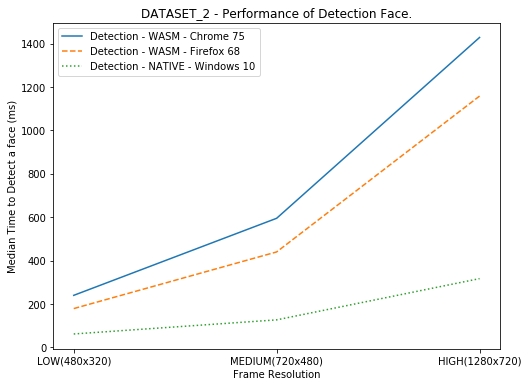

Nativo resolution_label
SMALL      240
MEDIUM     595
LARGE     1428
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL      179
MEDIUM     440
LARGE     1158
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL      240
MEDIUM     595
LARGE     1428
Name: median, dtype: int64
Comparação Nativo x Firefox: -2.46
Comparação Firefox x Chrome: -0.34


In [70]:
pro_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
pro_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
pro_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="Detection - WASM - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pro_f, label="Detection - WASM - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pro_w, label="Detection - NATIVE - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Frame Resolution')
plt.ylabel('Median Time to Detect a face (ms)')
plt.title("DATASET_2 - Performance of Detection Face.")
plt.legend()


plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median().round(2))

### Performance da Detecção - DATASET_03

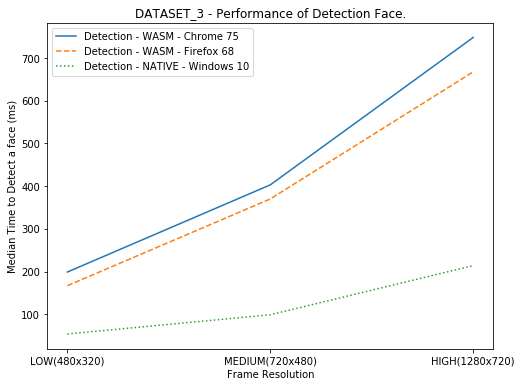

Nativo resolution_label
SMALL     199.0
MEDIUM    403.0
LARGE     748.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL     167.0
MEDIUM    370.0
LARGE     667.5
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL     199.0
MEDIUM    403.0
LARGE     748.0
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.12
Comparação Firefox x Chrome: -0.12


In [71]:
pro_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
pro_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
pro_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="Detection - WASM - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pro_f, label="Detection - WASM - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pro_w, label="Detection - NATIVE - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Frame Resolution')
plt.ylabel('Median Time to Detect a face (ms)')
plt.title("DATASET_3 - Performance of Detection Face.")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median().round(2))

### Comparativo medio de performance

In [72]:
ds1_pro_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
ds1_pro_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
ds1_pro_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
ds2_pro_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
ds2_pro_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
ds2_pro_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
ds3_pro_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
ds3_pro_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
ds3_pro_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()

df_pro_c = pd.concat([ds1_pro_c, ds2_pro_c, ds3_pro_c], sort=False)
df_pro_f = pd.concat([ds1_pro_f, ds2_pro_f, ds3_pro_f], sort=False)
df_pro_w = pd.concat([ds1_pro_w, ds2_pro_w, ds3_pro_w], sort=False)

print("Nativo", df_pro_w)
print("Wams Firefox", df_pro_f)
print("Wams Chrome", df_pro_c)
print("Comparação Nativo x Firefox:", ((((df_pro_w - df_pro_f) * 100)/df_pro_w)/100).median().round(2))
print("Comparação Nativo x Chrome:", ((((df_pro_w - df_pro_c) * 100)/df_pro_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((df_pro_f - df_pro_c) * 100)/df_pro_f)/100).median().round(2))


Nativo resolution_label
SMALL      53.0
MEDIUM    107.0
LARGE     243.0
SMALL      62.0
MEDIUM    127.0
LARGE     317.0
SMALL      54.0
MEDIUM     99.0
LARGE     214.0
Name: median, dtype: float64
Wams Firefox resolution_label
SMALL      161.0
MEDIUM     371.0
LARGE      901.0
SMALL      179.0
MEDIUM     440.0
LARGE     1158.0
SMALL      167.0
MEDIUM     370.0
LARGE      667.5
Name: median, dtype: float64
Wams Chrome resolution_label
SMALL      196.0
MEDIUM     428.0
LARGE     1069.5
SMALL      240.0
MEDIUM     595.0
LARGE     1428.0
SMALL      199.0
MEDIUM     403.0
LARGE      748.0
Name: median, dtype: float64
Comparação Nativo x Firefox: -2.46
Comparação Nativo x Chrome: -3.0
Comparação Firefox x Chrome: -0.19


### Performance da Pré-detecção - DATASET_01

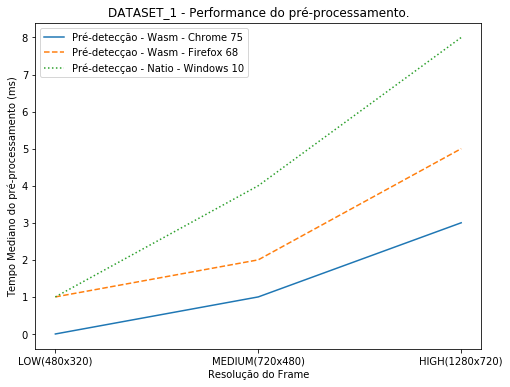

Nativo resolution_label
SMALL     1
MEDIUM    4
LARGE     8
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     1
MEDIUM    2
LARGE     5
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     0
MEDIUM    1
LARGE     3
Name: median, dtype: int64
Comparação Chrome x Nativo: -3.0
Comparação Chrome x Firefox: -1.0


In [73]:
pre_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
pre_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
pre_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="Pré-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pre_f, label="Pré-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pre_w, label="Pré-detecçao - Natio - Windows 10",linestyle=linestyles[3])
ax.legend()


plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano do pré-processamento (ms)')
plt.title("DATASET_1 - Performance do pré-processamento.")
plt.legend()

plt.show()

print("Nativo", pre_w)
print("Wams Firefox", pre_f)
print("Wams Chrome", pre_c)
print("Comparação Chrome x Nativo:", ((((pre_c - pre_w) * 100)/pre_c)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((pre_c - pre_f) * 100)/pre_c)/100).median().round(2))

### Performance da Pré-detecção - DATASET_02

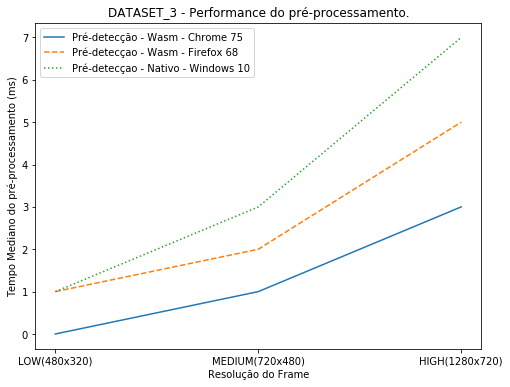

Nativo resolution_label
SMALL     1
MEDIUM    3
LARGE     7
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     1
MEDIUM    2
LARGE     5
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     0
MEDIUM    1
LARGE     3
Name: median, dtype: int64
Comparação Chrome x Nativo: -2.0
Comparação Chrome x Firefox: -1.0


In [74]:
pre_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
pre_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
pre_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="Pré-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pre_f, label="Pré-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pre_w, label="Pré-detecçao - Nativo - Windows 10",linestyle=linestyles[3])
ax.legend()


plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano do pré-processamento (ms)')
plt.title("DATASET_3 - Performance do pré-processamento.")
plt.legend()

plt.show()

print("Nativo", pre_w)
print("Wams Firefox", pre_f)
print("Wams Chrome", pre_c)
print("Comparação Chrome x Nativo:", ((((pre_c - pre_w) * 100)/pre_c)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((pre_c - pre_f) * 100)/pre_c)/100).median().round(2))

### Performance da Pré-detecção - DATASET_03

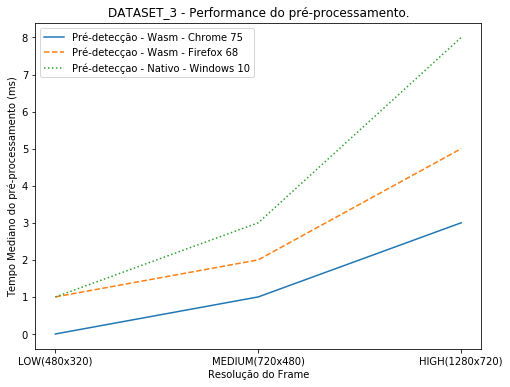

Nativo resolution_label
SMALL     1
MEDIUM    3
LARGE     8
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     1
MEDIUM    2
LARGE     5
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     0
MEDIUM    1
LARGE     3
Name: median, dtype: int64
Comparação Chrome x Nativo: -2.0
Comparação Chrome x Firefox: -1.0


In [75]:
pre_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
pre_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
pre_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="Pré-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pre_f, label="Pré-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pre_w, label="Pré-detecçao - Nativo - Windows 10",linestyle=linestyles[3])
ax.legend()


plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano do pré-processamento (ms)')
plt.title("DATASET_3 - Performance do pré-processamento.")
plt.legend()

plt.show()

print("Nativo", pre_w)
print("Wams Firefox", pre_f)
print("Wams Chrome", pre_c)
print("Comparação Chrome x Nativo:", ((((pre_c - pre_w) * 100)/pre_c)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((pre_c - pre_f) * 100)/pre_c)/100).median().round(2))

### Comparativo pré-processamento

In [76]:
ds1_pre_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
ds1_pre_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
ds1_pre_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
ds2_pre_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
ds2_pre_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
ds2_pre_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
ds3_pre_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
ds3_pre_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
ds3_pre_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()

df_pre_c = pd.concat([ds1_pre_c, ds2_pre_c, ds3_pre_c], sort=False)
df_pre_f = pd.concat([ds1_pre_f, ds2_pre_f, ds3_pre_f], sort=False)
df_pre_w = pd.concat([ds1_pre_w, ds2_pre_w, ds3_pre_w], sort=False)

print("Nativo", df_pre_w)
print("Wams Firefox", df_pre_f)
print("Wams Chrome", df_pre_c)
print("Comparação Chrome x Firefox:", ((((df_pre_c - df_pre_f) * 100)/df_pre_c)/100).median().round(2))
print("Comparação Chrome x Nativo:", ((((df_pre_c - df_pre_w) * 100)/df_pre_c)/100).median().round(2))
print("Comparação Firefox x Nativo:", ((((df_pre_f - df_pre_w) * 100)/df_pre_f)/100).median().round(2))


Nativo resolution_label
SMALL     1
MEDIUM    4
LARGE     8
SMALL     1
MEDIUM    3
LARGE     7
SMALL     1
MEDIUM    3
LARGE     8
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     1
MEDIUM    2
LARGE     5
SMALL     1
MEDIUM    2
LARGE     5
SMALL     1
MEDIUM    2
LARGE     5
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     0
MEDIUM    1
LARGE     3
SMALL     0
MEDIUM    1
LARGE     3
SMALL     0
MEDIUM    1
LARGE     3
Name: median, dtype: int64
Comparação Chrome x Firefox: -1.0
Comparação Chrome x Nativo: -2.0
Comparação Firefox x Nativo: -0.5


### Performance da Marcação - DATASET_1

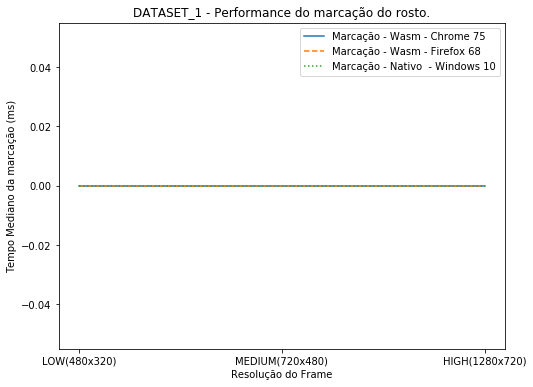

In [77]:
tag_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['tag_time_ms']['median'].sort_values()
tag_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['tag_time_ms']['median'].sort_values()
tag_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['tag_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, tag_c, label="Marcação - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, tag_f, label="Marcação - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, tag_w, label="Marcação - Nativo  - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_1 - Performance do marcação do rosto.")
plt.legend()

plt.show()

### Performance da Marcação - DATASET_2

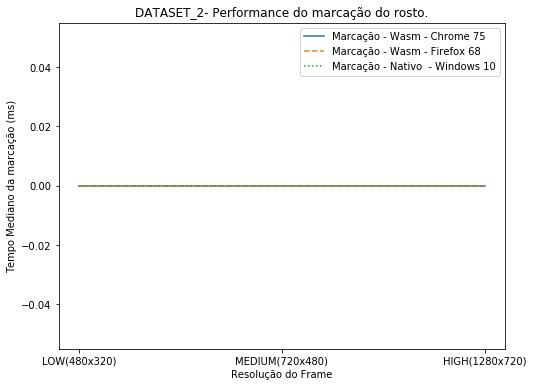

In [78]:
tag_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['tag_time_ms']['median'].sort_values()
tag_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['tag_time_ms']['median'].sort_values()
tag_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['tag_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, tag_c, label="Marcação - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, tag_f, label="Marcação - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, tag_w, label="Marcação - Nativo  - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_2- Performance do marcação do rosto.")
plt.legend()

plt.show()

### Performance da Marcação - DATASET_3

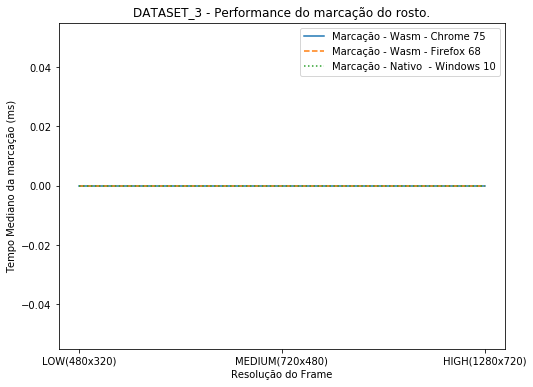

In [79]:
tag_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['tag_time_ms']['median'].sort_values()
tag_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['tag_time_ms']['median'].sort_values()
tag_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['tag_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, tag_c, label="Marcação - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, tag_f, label="Marcação - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, tag_w, label="Marcação - Nativo  - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_3 - Performance do marcação do rosto.")
plt.legend()

plt.show()

### Performance do Pós-detecção - DATASET_1

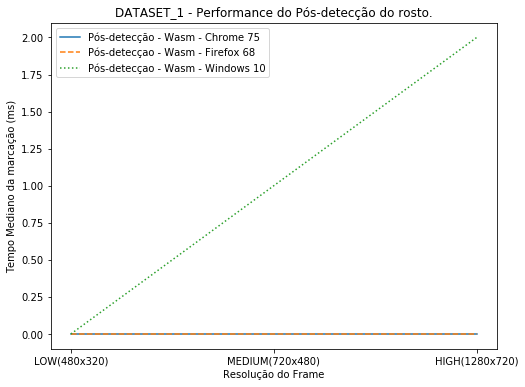

In [80]:
pos_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['pos_time_ms']['median'].sort_values()
pos_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['pos_time_ms']['median'].sort_values()
pos_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['pos_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pos_c, label="Pós-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pos_f, label="Pós-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pos_w, label="Pós-detecçao - Wasm - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_1 - Performance do Pós-detecção do rosto.")
plt.legend()

plt.show()

### Performance do Pós-detecção - DATASET_2

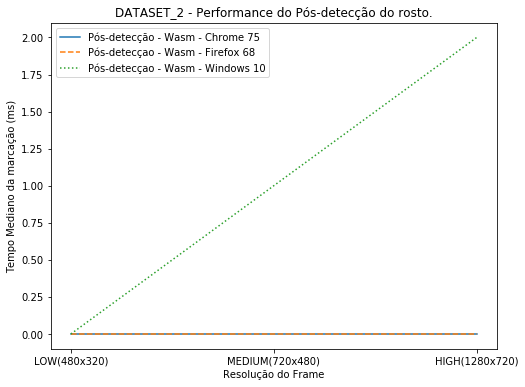

In [81]:
pos_c = df_ds2_st.loc['DATASET_2','Chrome_75_Windows']['pos_time_ms']['median'].sort_values()
pos_f = df_ds2_st.loc['DATASET_2','Firefox_68_Windows']['pos_time_ms']['median'].sort_values()
pos_w = df_ds2_st.loc['DATASET_2','WINDOWS_10_WIN32']['pos_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pos_c, label="Pós-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pos_f, label="Pós-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pos_w, label="Pós-detecçao - Wasm - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_2 - Performance do Pós-detecção do rosto.")
plt.legend()

plt.show()

### Performance do Pós-detecção - DATASET_3

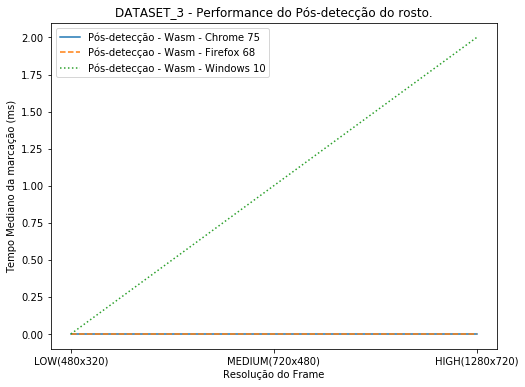

In [82]:
pos_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['pos_time_ms']['median'].sort_values()
pos_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['pos_time_ms']['median'].sort_values()
pos_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['pos_time_ms']['median'].sort_values()
activity = ["LOW(480x320)", "MEDIUM(720x480)", "HIGH(1280x720)"]

fig, ax = plt.subplots()
ax.plot(activity, pos_c, label="Pós-detecção - Wasm - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pos_f, label="Pós-detecçao - Wasm - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pos_w, label="Pós-detecçao - Wasm - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo Mediano da marcação (ms)')
plt.title("DATASET_3 - Performance do Pós-detecção do rosto.")
plt.legend()

plt.show()

### Performance of the Proof of Concept

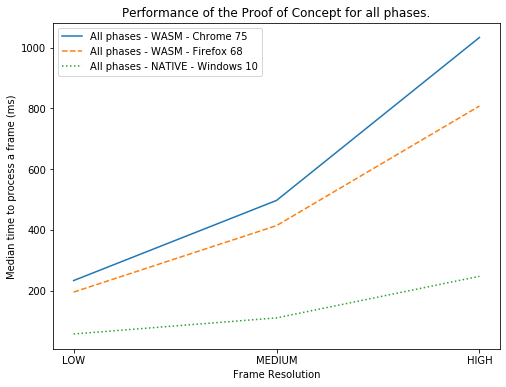

Nativo resolution_label
SMALL      57
MEDIUM    110
LARGE     247
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     195
MEDIUM    414
LARGE     808
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL      233
MEDIUM     497
LARGE     1034
Name: median, dtype: int64
Comparação Nativo x Firefox: -2.49
Comparação Chrome x Firefox: 0.18


In [90]:
total_c = df_ds_st.loc['Chrome_75_Windows']['total_time_ms']['median'].sort_values()
total_f = df_ds_st.loc['Firefox_68_Windows']['total_time_ms']['median'].sort_values()
total_w = df_ds_st.loc['WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]

plt.rcParams["figure.figsize"] = (8,6)

linestyles = ['-', '--', '-.', ':']

fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="All phases - WASM - Chrome 75", linestyle=linestyles[0])
ax1.plot(activity, total_f, label="All phases - WASM - Firefox 68",linestyle=linestyles[1])
ax1.plot(activity, total_w, label="All phases - NATIVE - Windows 10",linestyle=linestyles[3])
ax1.legend()

plt.xlabel('Frame Resolution')
plt.ylabel('Median time to process a frame (ms)')
plt.title("Performance of the Proof of Concept for all phases.")
plt.legend()

plt.show()

print("Nativo", total_w)
print("Wams Firefox", total_f)
print("Wams Chrome", total_c)
print("Comparação Nativo x Firefox:", ((((total_w - total_f) * 100)/total_w)/100).mean().round(2))
print("Comparação Chrome x Firefox:", ((((total_c - total_f) * 100)/total_c)/100).mean().round(2))

### Performance of Detection Face

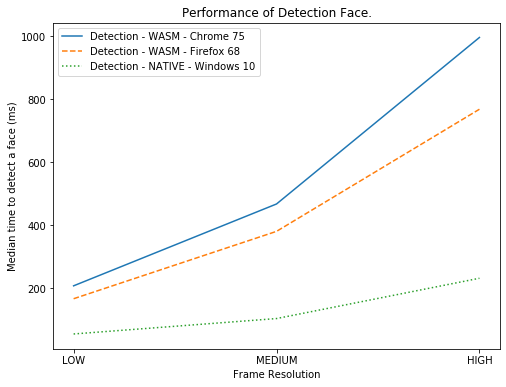

Nativo resolution_label
SMALL     207
MEDIUM    467
LARGE     996
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     166
MEDIUM    380
LARGE     768
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     207
MEDIUM    467
LARGE     996
Name: median, dtype: int64
Comparação Nativo x Firefox: -2.32
Comparação Firefox x Chrome: -0.25


In [91]:
pro_c = df_ds_st.loc['Chrome_75_Windows']['process_time_ms']['median'].sort_values()
pro_f = df_ds_st.loc['Firefox_68_Windows']['process_time_ms']['median'].sort_values()
pro_w = df_ds_st.loc['WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="Detection - WASM - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pro_f, label="Detection - WASM - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pro_w, label="Detection - NATIVE - Windows 10",linestyle=linestyles[3])
ax.legend()

plt.xlabel('Frame Resolution')
plt.ylabel('Median time to detect a face (ms)')
plt.title("Performance of Detection Face.")
plt.legend()

plt.show()

print("Nativo", pro_c)
print("Wams Firefox", pro_f)
print("Wams Chrome", pro_c)
print("Comparação Nativo x Firefox:", ((((pro_w - pro_f) * 100)/pro_w)/100).median().round(2))
print("Comparação Firefox x Chrome:", ((((pro_f - pro_c) * 100)/pro_f)/100).median().round(2))

### Performance of the Pre-processing

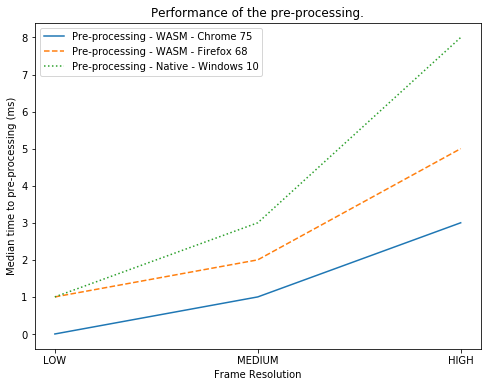

Nativo resolution_label
SMALL     1
MEDIUM    3
LARGE     8
Name: median, dtype: int64
Wams Firefox resolution_label
SMALL     1
MEDIUM    2
LARGE     5
Name: median, dtype: int64
Wams Chrome resolution_label
SMALL     0
MEDIUM    1
LARGE     3
Name: median, dtype: int64
Comparação Chrome x Nativo: -2.0
Comparação Chrome x Firefox: -1.0


In [92]:
pre_c = df_ds_st.loc['Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
pre_f = df_ds_st.loc['Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
pre_w = df_ds_st.loc['WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
activity = ["LOW", "MEDIUM", "HIGH"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="Pre-processing - WASM - Chrome 75",linestyle=linestyles[0])
ax.plot(activity, pre_f, label="Pre-processing - WASM - Firefox 68",linestyle=linestyles[1])
ax.plot(activity, pre_w, label="Pre-processing - Native - Windows 10",linestyle=linestyles[3])
ax.legend()


plt.xlabel('Frame Resolution')
plt.ylabel('Median time to pre-processing (ms)')
plt.title("Performance of the pre-processing.")
plt.legend()

plt.show()

print("Nativo", pre_w)
print("Wams Firefox", pre_f)
print("Wams Chrome", pre_c)
print("Comparação Chrome x Nativo:", ((((pre_c - pre_w) * 100)/pre_c)/100).median().round(2))
print("Comparação Chrome x Firefox:", ((((pre_c - pre_f) * 100)/pre_c)/100).median().round(2))